# `Slice` and `AlignmentDataset` objects

The `paste3.dataset` module provides an easy-to-use API to access input datasets to the `paste3` alignment algorithms.

The `Slice` class is a thin layer on top of an `AnnData` class, and an `AlignmentDataset` class is a collection of `Slice` objects.

In [1]:
from pathlib import Path

from paste3.dataset import AlignmentDataset
from paste3.napari.data.ondemand import get_file

Individual `Slice` objects are created by providing a path to an `.h5ad` file. Each `.h5ad` file is expected to contain an `AnnData` object, and is internally read using a `scanpy.read_h5ad`.

Here we download and cache a few `.h5ad` files locally using a `paste3.napari.data.ondemand.get_file` call. These are the files available as the Sample Data in the `paste3` napari plugin.

In [2]:
slice_files = [Path(f) for f in get_file("paste3_sample_patient_2_")]

A dataset is created using the paths to the individual slices.

In [3]:
dataset = AlignmentDataset(file_paths=slice_files)

Any individual slice can be rendered in a jupyter notebook by simply typing the slice variable name in a cell, which renders the slice using the `scanpy` library. (Note: This is roughly equivalent to doing `scanpy.pl.spatial(<slice>.adata, ..)`)

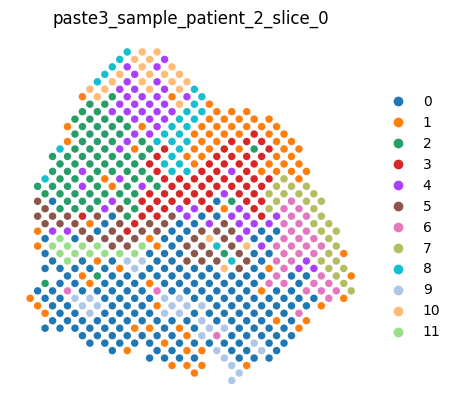

In [4]:
dataset.slices[0]

An entire dataset can be rendered by typing the dataset variable name in a cell, which renders each slice in order.

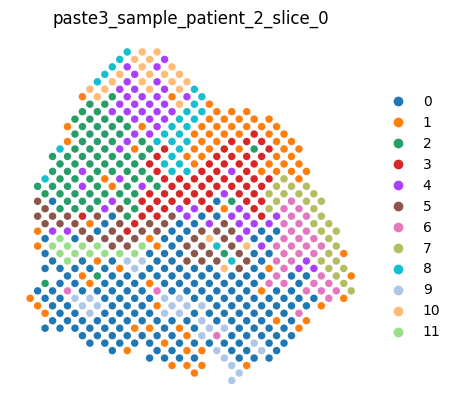

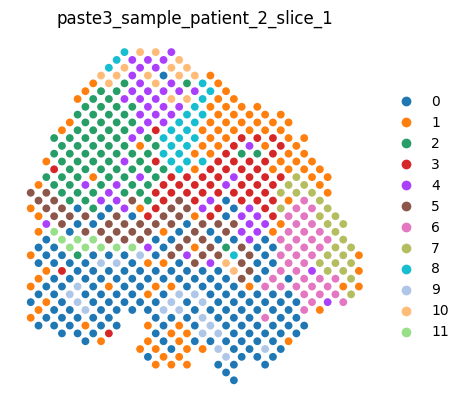

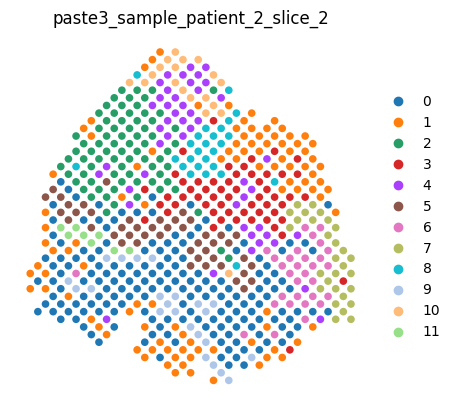

In [5]:
dataset

## Center Aligning a Dataset

A dataset object can be center aligned in 2 steps:

1. Find the "center slice" (or the "consensus slice") and similarity matrix between spots using the `<dataset>.find_center_slice` method. **This is a time consuming step and benefits from being run on a GPU-enabled environment.**
2. Use these values to center align the dataset using the `<dataset>.center_align` method.

The first returned value is the aligned dataset, along with other useful information (rotations/translations). Here we ignore all returned values except the first one.

Center alignment is explained in detail in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper.

In [6]:
center_slice, pis = dataset.find_center_slice()
aligned_dataset, *_ = dataset.center_align(center_slice=center_slice, pis=pis)

(INFO) (dataset.py) (03-Dec-24 20:42:58) Finding center slice


(INFO) (paste.py) (03-Dec-24 20:42:58) GPU is not available, resorting to torch CPU.


(INFO) (paste.py) (03-Dec-24 20:42:58) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:43:26) Iteration: 0


(INFO) (paste.py) (03-Dec-24 20:43:26) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:43:26) Slice 0


(INFO) (paste.py) (03-Dec-24 20:43:27) Slice 1


(INFO) (paste.py) (03-Dec-24 20:43:27) Slice 2


(INFO) (paste.py) (03-Dec-24 20:43:28) center_ot done


(INFO) (paste.py) (03-Dec-24 20:43:28) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:43:39) Objective -142.823338350008 | Difference: 142.823338350008


(INFO) (paste.py) (03-Dec-24 20:43:39) Iteration: 1


(INFO) (paste.py) (03-Dec-24 20:43:39) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:43:39) Slice 0


(INFO) (paste.py) (03-Dec-24 20:43:40) Slice 1


(INFO) (paste.py) (03-Dec-24 20:43:41) Slice 2


(INFO) (paste.py) (03-Dec-24 20:43:42) center_ot done


(INFO) (paste.py) (03-Dec-24 20:43:42) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:43:52) Objective 0.8911539927913317 | Difference: 143.71449234279933


(INFO) (paste.py) (03-Dec-24 20:43:52) Iteration: 2


(INFO) (paste.py) (03-Dec-24 20:43:52) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:43:52) Slice 0


(INFO) (paste.py) (03-Dec-24 20:43:52) Slice 1


(INFO) (paste.py) (03-Dec-24 20:43:52) Slice 2


(INFO) (paste.py) (03-Dec-24 20:43:53) center_ot done


(INFO) (paste.py) (03-Dec-24 20:43:53) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:44:03) Objective 0.9019732571790533 | Difference: 0.010819264387721628


(INFO) (paste.py) (03-Dec-24 20:44:03) Iteration: 3


(INFO) (paste.py) (03-Dec-24 20:44:03) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:44:03) Slice 0


(INFO) (paste.py) (03-Dec-24 20:44:04) Slice 1


(INFO) (paste.py) (03-Dec-24 20:44:04) Slice 2


(INFO) (paste.py) (03-Dec-24 20:44:05) center_ot done


(INFO) (paste.py) (03-Dec-24 20:44:05) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:44:15) Objective 0.9002868097404992 | Difference: 0.0016864474385540618


(INFO) (paste.py) (03-Dec-24 20:44:15) Iteration: 4


(INFO) (paste.py) (03-Dec-24 20:44:15) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:44:15) Slice 0


(INFO) (paste.py) (03-Dec-24 20:44:16) Slice 1


(INFO) (paste.py) (03-Dec-24 20:44:17) Slice 2


(INFO) (paste.py) (03-Dec-24 20:44:17) center_ot done


(INFO) (paste.py) (03-Dec-24 20:44:17) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:44:28) Objective 0.9041388325985553 | Difference: 0.003852022858056081


(INFO) (paste.py) (03-Dec-24 20:44:28) Iteration: 5


(INFO) (paste.py) (03-Dec-24 20:44:28) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:44:28) Slice 0


(INFO) (paste.py) (03-Dec-24 20:44:28) Slice 1


(INFO) (paste.py) (03-Dec-24 20:44:29) Slice 2


(INFO) (paste.py) (03-Dec-24 20:44:29) center_ot done


(INFO) (paste.py) (03-Dec-24 20:44:29) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:44:41) Objective 0.9028095352923222 | Difference: 0.0013292973062331015


(INFO) (paste.py) (03-Dec-24 20:44:41) Iteration: 6


(INFO) (paste.py) (03-Dec-24 20:44:41) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:44:41) Slice 0


(INFO) (paste.py) (03-Dec-24 20:44:42) Slice 1


(INFO) (paste.py) (03-Dec-24 20:44:42) Slice 2


(INFO) (paste.py) (03-Dec-24 20:44:42) center_ot done


(INFO) (paste.py) (03-Dec-24 20:44:42) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:44:53) Objective 0.9015442745618676 | Difference: 0.0012652607304546315


(INFO) (paste.py) (03-Dec-24 20:44:53) Iteration: 7


(INFO) (paste.py) (03-Dec-24 20:44:53) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:44:53) Slice 0


(INFO) (paste.py) (03-Dec-24 20:44:53) Slice 1


(INFO) (paste.py) (03-Dec-24 20:44:53) Slice 2


(INFO) (paste.py) (03-Dec-24 20:44:54) center_ot done


(INFO) (paste.py) (03-Dec-24 20:44:54) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:45:04) Objective 0.8992431814959418 | Difference: 0.002301093065925741


(INFO) (paste.py) (03-Dec-24 20:45:04) Iteration: 8


(INFO) (paste.py) (03-Dec-24 20:45:04) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:45:04) Slice 0


(INFO) (paste.py) (03-Dec-24 20:45:04) Slice 1


(INFO) (paste.py) (03-Dec-24 20:45:05) Slice 2


(INFO) (paste.py) (03-Dec-24 20:45:05) center_ot done


(INFO) (paste.py) (03-Dec-24 20:45:05) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:45:16) Objective 0.9043088058588691 | Difference: 0.005065624362927235


(INFO) (paste.py) (03-Dec-24 20:45:16) Iteration: 9


(INFO) (paste.py) (03-Dec-24 20:45:16) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (03-Dec-24 20:45:16) Slice 0


(INFO) (paste.py) (03-Dec-24 20:45:17) Slice 1


(INFO) (paste.py) (03-Dec-24 20:45:17) Slice 2


(INFO) (paste.py) (03-Dec-24 20:45:17) center_ot done


(INFO) (paste.py) (03-Dec-24 20:45:17) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (03-Dec-24 20:45:28) Objective 0.8992027617655358 | Difference: 0.005106044093333262


(INFO) (paste.py) (03-Dec-24 20:45:29) Center slice computed.


(INFO) (dataset.py) (03-Dec-24 20:45:29) Center aligning


(INFO) (dataset.py) (03-Dec-24 20:45:29) Stacking slices around center slice


We can render the center slice and the aligned dataset as usual.

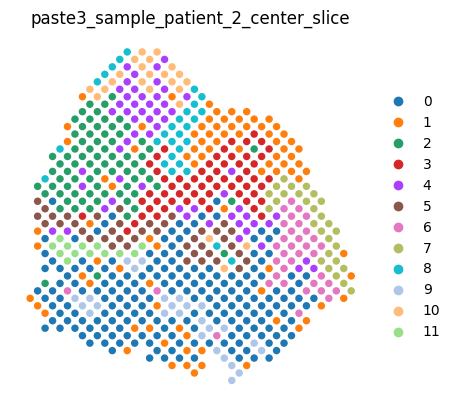

In [7]:
center_slice

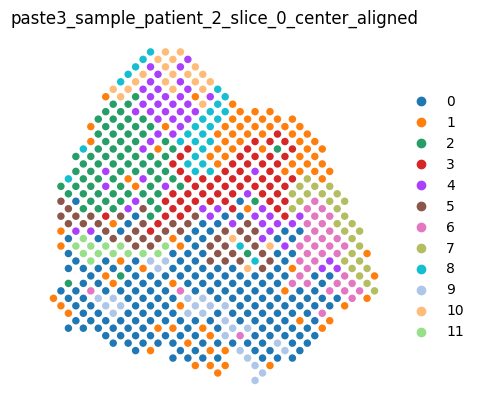

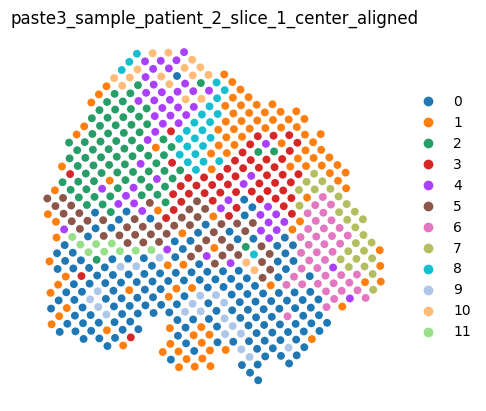

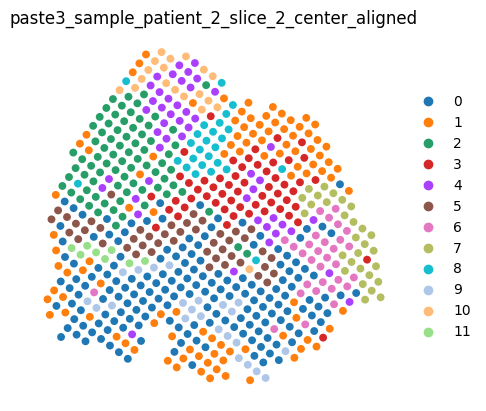

In [8]:
aligned_dataset

## Pairwise aligning a Dataset

A dataset can be pairwise aligned using the `<dataset>.pairwise_align` method. An `overlap_fraction` value (between 0 and 1) can be specified.

A value of `None` results in pairwise alignment that is identical to the approach mentioned in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper. Any other value between 0 and 1 results in pairwise alignment explained in the [Paste2](https://pubmed.ncbi.nlm.nih.gov/37553263/) paper.

In [9]:
pairwise_aligned_dataset = dataset.pairwise_align(overlap_fraction=0.7)

(INFO) (dataset.py) (03-Dec-24 20:45:30) Finding Pi for slices 0 and 1


(INFO) (paste.py) (03-Dec-24 20:45:30) GPU is not available, resorting to torch CPU.


(INFO) (dataset.py) (03-Dec-24 20:45:32) Finding Pi for slices 1 and 2


(INFO) (paste.py) (03-Dec-24 20:45:32) GPU is not available, resorting to torch CPU.


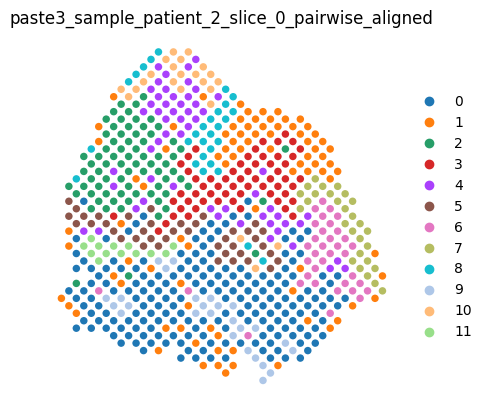

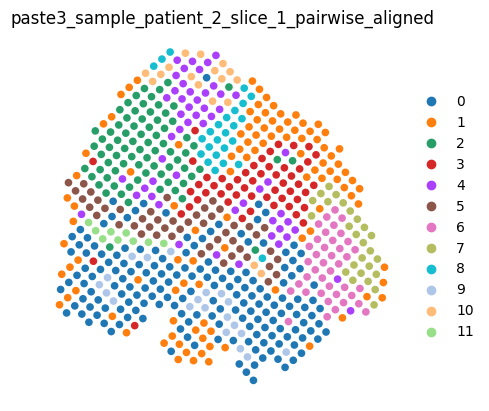

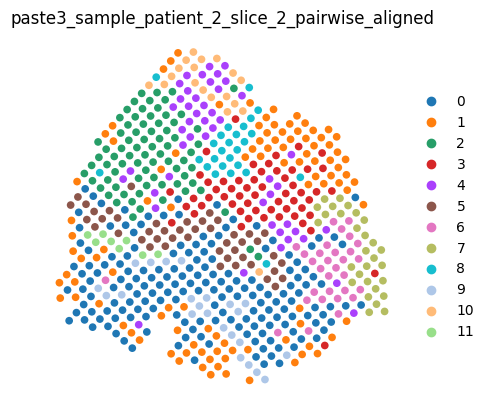

In [10]:
pairwise_aligned_dataset[0]